<a href="https://colab.research.google.com/github/hevertonvalerio/TensorFlow/blob/main/Tensor_Flow_ML_Zero_to_Hero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução a Machine Learning (ML de Zero a 100, parte 1) by TensorFlow


# Parte 1 - NN (Neural Network)

Link do Vídeo: https://www.youtube.com/watch?v=KNAWp2S3w94

Apresentação do notebook da aula no codelabs:  https://goo.gle/2Zp2ZF3

Codelabs:https://developers.google.com/codelabs/tensorflow-1-helloworld?hl=pt-br#5

## Programação Tradicional vs Machine Learning

**Programação Tradicional:**

Regras -> Dados = Respostas

  <br>

**Machine Learning:**

 Respostas -> Dados = Regras

 O computador recebe respotas por parte do programdor e descobre os padrões que combinam entre si. Então ele pode identificar sozinho.

In [1]:
import numpy as np
import keras as keras

In [ ]:
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500)

print(model.predict([10.0]))

In [ ]:
list = np.array([5.0, 6.0, 7.0, 8.0, 9.0], dtype=float)

for i in list:
  print(model.predict([i]))

In [ ]:
model = keras.Sequential([ #Essa é a rede neural que esta sendo definida no modelo.
    keras.layers.Dense( #Essa rede neural possui apenas uma camada
        units=1, #Esssa camada possui apenas 1 neuronio (units = 1).
        input_shape=[1]
        )
    ])


model.compile( # Ao compilarmos temos duas funções: otimizador e perda, essas são as chaves para o machine learning. Com isso o modelo fará uma suposição entre os números.
    optimizer='sgd', # O otimizador irá supor uma regra adequada, exemplo: 5x + 5,
    loss='mean_squared_error' # No treinamento o modelo irá calcular o quão bom é essa suposição através da função perda.
    )

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float) # Os dados são configurados como uma matriz de X e Y
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float) #(A regra correta para Y é 2x - 1)

model.fit(xs, ys, epochs=150) # Ele fará essa avaliação com a função perda e uma nova tentativa a com a função otimizador, 150 vezes definida por (epochs=150)

print(
    model.predict([10.0]) # Uma vez que o modelo foi treinado, é possível prever o valor de Y dado o valor de X
    )

## Função Loss e Optmizer

Quando o computador está tentando aprender isso, ele faz uma suposição, talvez Y=10X+10. A função loss mede as respostas adivinhadas em relação às respostas corretas e avalia o desempenho da qualidade.

Em seguida, o modelo usa a função optimizer para fazer outra suposição. Com base na função de perda, ele tenta minimizar a perda. Neste ponto, talvez você veja algo como Y=5X+5. Embora isso ainda seja muito ruim, ele está mais perto do resultado correto (a perda é menor).

O modelo repete isso pelo número de épocas, que você verá em breve.

Primeiro, veja como instruí-lo a usar mean_squared_error para a perda e descendente estocástico (sgd) para o otimizador. Você ainda não precisa entender a matemática, mas dá para ver que elas funcionam.

Com o tempo, você aprenderá as diferentes funções de perda e otimização e, em cada caso, diferentes

# Parte 2 - DNN (Deep Neural Network):


Iremos construir uma rede neural profunda (DNN) treinada para classificar as diferentes peças de roupas no banco de imgens Mnist às suas respectivas categorias

Link do Vídeo:  https://www.youtube.com/watch?v=bemDFpNooA8

Codelabs: https://developers.google.com/codelabs/tensorflow-2-computervision?hl=pt-br#2

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Mais sobre o dataset Mnist (https://github.com/zalandoresearch/fashion-mnist).

In [5]:
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
[training_images.shape,
training_labels.shape,
test_images.shape,
test_labels.shape,]

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

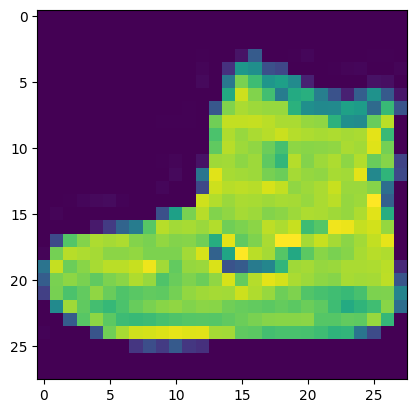

In [8]:
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [11]:
# Normalizing the dataset (ou escalonar)

training_images = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
training_images[0]

In [46]:
model = tf.keras.models.Sequential([ #Sequencial define a sequência de camadas da rede neural
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Input_shape define o tamanho da imagem
    tf.keras.layers.Dense(128, activation=tf.nn.relu),#(Relu retorna x se >0 e 0 se não for maior) # 128 nós vamos ter 128 funções, cada uma com parametros dentro dela, quando os pixels dos sapatos forem aliemtados dentro dela, a combinação de todos os valores produza o número correto ou seja 9. para isso computador deverá descobrir os parametros de cada uma função que obtem esse resultado, em seguida extenda isso para todos os outros itens de vestuário no conjunto. Tendo feito isso o modelo estará treinado para reconhecer cada item de vestuário.
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Softmax simplifica as probabilidades de cada um dos 10 itens. tornando 1 a maior probabialidade e 0 todas as.
])


In [47]:
model.compile(optimizer = tf.keras.optimizers.Adam(), # Definindo o otimizador
              loss = 'sparse_categorical_crossentropy', # Definindo a função perda
              metrics=['accuracy']) #Apresentando as métricas de acurácia ao longo da evolução do modelo.

model.fit(training_images, training_labels, epochs=5) # Definindo as instâncias de treino do modelo e sua quantidade de Epochs

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3025 - accuracy: 0.1035
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3001 - accuracy: 0.1252
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2907 - accuracy: 0.1682
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2719 - accuracy: 0.2126
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2425 - accuracy: 0.2590


In [48]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels) # Testando o Modelo e apresentando suas métricas de perda e acurácia
print('Test loss: {}, Test Accuracy: {}'.format(test_loss, test_accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 2.2246 - accuracy: 0.2966
Test loss: 2.2246317863464355, Test Accuracy: 29.660001397132874


----

# Parate 3 - CNN (Convolutionl Neural Network):

**CNNs (Redes Neurais convolucionais)** - filtram as imagens recebidas, tornando-as menos complexas para otimizar a análise da rede neural. Evidenciando as características da imagem para melhor classificá-las.

Nas CNN os filtros são "apreendidos", assim como os parêmetros da equação da primeira NN, na parte 1.

Por exemplo para que a DNN consiga identificar o item de vestuário em imagens com outros objetos ou onde ele não esteja posicionado na frente e no centro será necessário utilizar as convoluções.

**Poolings** - reduzem o tamanho das imagens mantendo suas características principais, através de Kernels

Link do Vídeo: https://www.youtube.com/watch?v=x_VrgWTKkiM

codelabs: https://developers.google.com/codelabs/tensorflow-3-convolutions?hl=pt-br#1

In [49]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as pd
from scipy import misc
import numpy as np
i = misc.ascent()

<ipython-input-49-df0746391358>:7: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  i = misc.ascent()


In [52]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Após a multiplicação dos filtros pelas imagens. Cada Epochs irá compreender qual filtrou gerou os melhores sinais para ajudar a combinar as imagens com seus rótulos

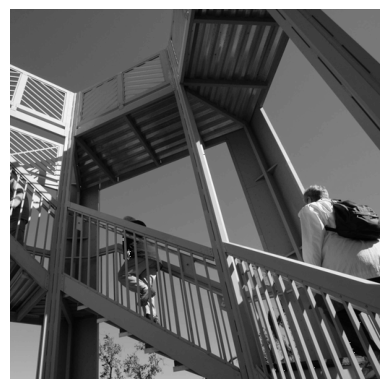

In [53]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [56]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [60]:
# This filter detects edges nicely
# It creates a filter that only passes through sharp edges and straight lines.
# Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
# A couple more filters to try for fun!
#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
#filter = [ [-1, -2, -1, -1, -2], [0, 0, 0, 0, 0], [1, 2, 1, 1, 2]]

 # If all the digits in the filter don't add up to 0 or 1, you
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [63]:
# Esses filtros permitem a passagem apenas de estreitas linhas horizontais ou verticais
# É possível experimentar diferentes filtros para diferentes resultados.

# Filtro 1:
# filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
# Filtro 2:
# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# Filtro 3:
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
# Filtro 4 (esse possui um kernel 5x5):
#filter = [ [-1, -2, -1, -1, -2], [0, 0, 0, 0, 0], [1, 2, 1, 1, 2]]

# Caso a somatória dos dígitos do filtro não resultem em 0 ou 1,
# será necessária aplicar um peso para "normalizá-los".
weight  = 1

In [61]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

# Organização de filtragem pixel a pixel:
# For x in range:(1 à 512)
  # For y in range:(1 à 512)
# X1(y1, y2... y512), x2(y1, y2... y512)... x512(y1, y2... y512)

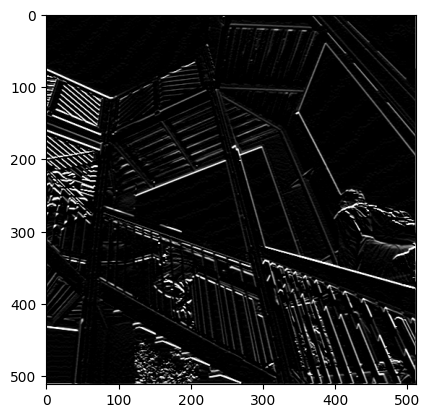

In [62]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

Funcionamento de um Filtro

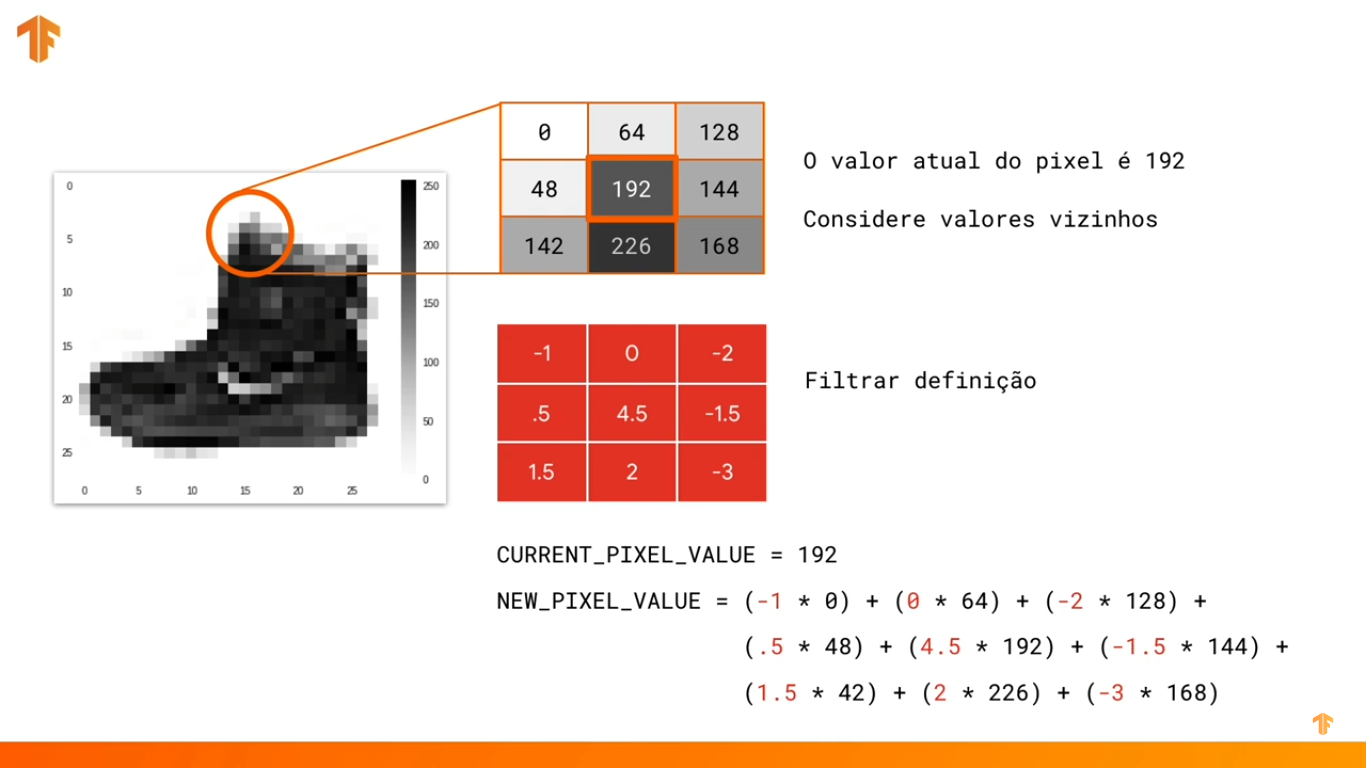

Nesse caso é especificado um *kernel* 3x3, está é a **matriz convolucional** da imagem.

O uso do filtro: [-1,0,1,-2,0,2,-1,0,1] fornece um conjunto muito forte de linhas verticais:

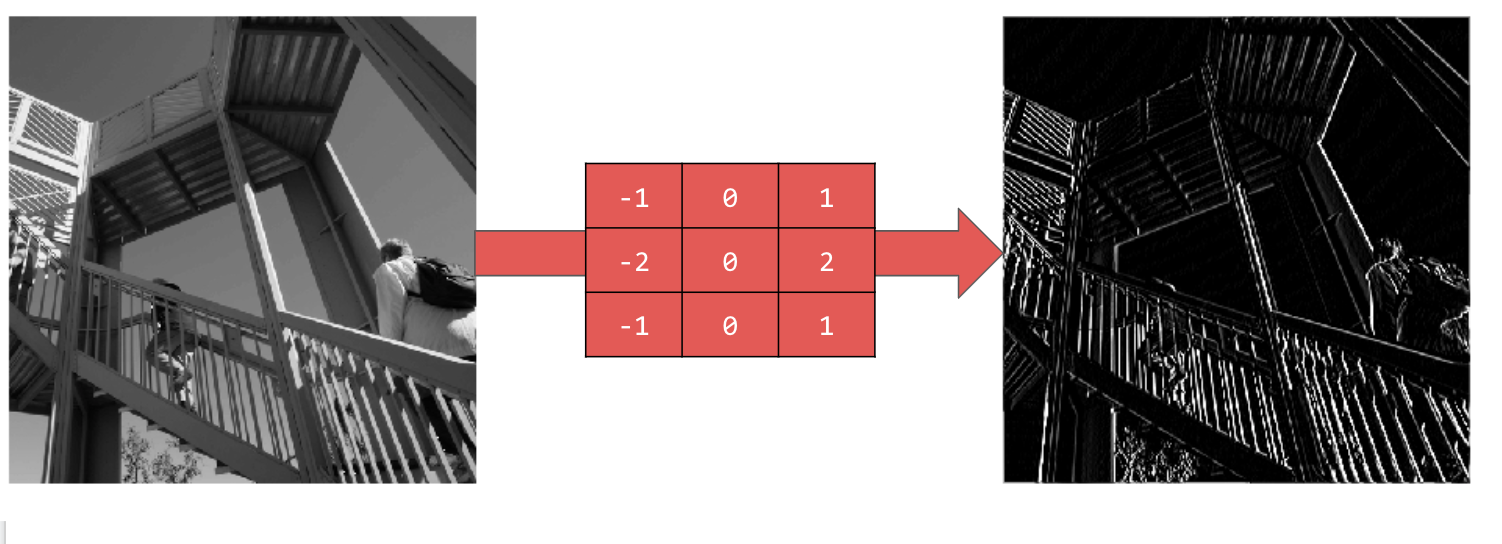

O uso do filtro: [-1,-2,-1,0,0,0,1,2,1] fornece linhas horizontais:



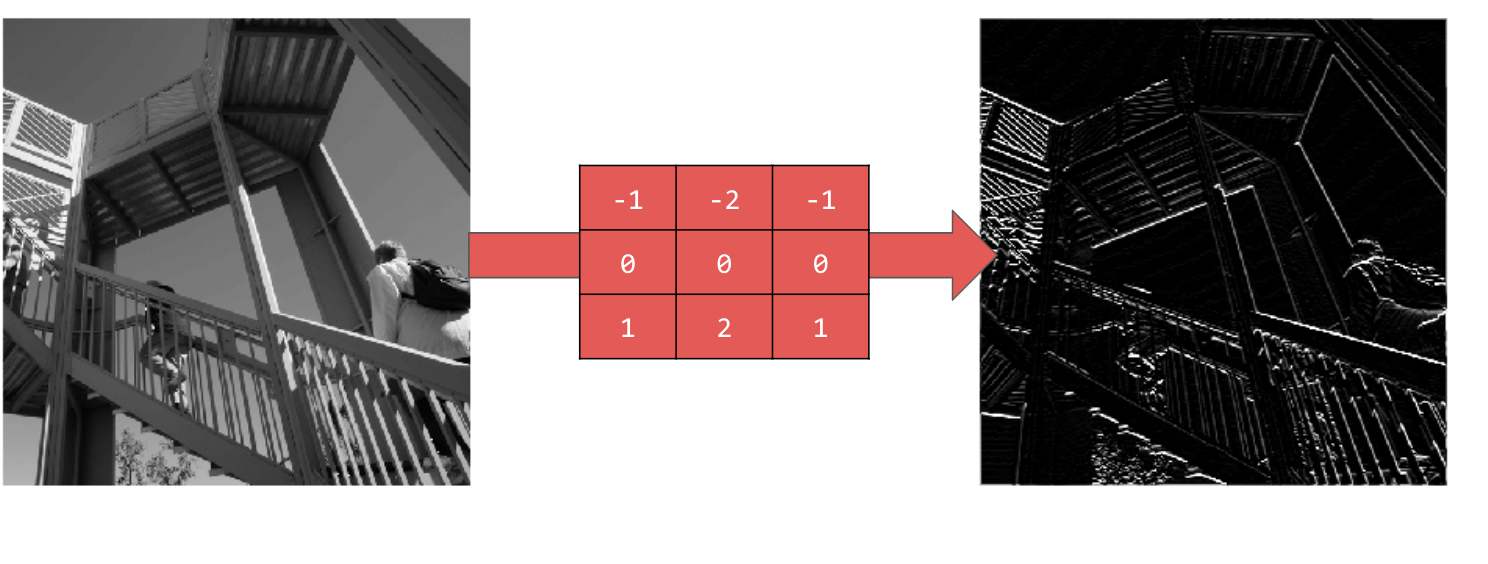

Funcionamento de um Pool:

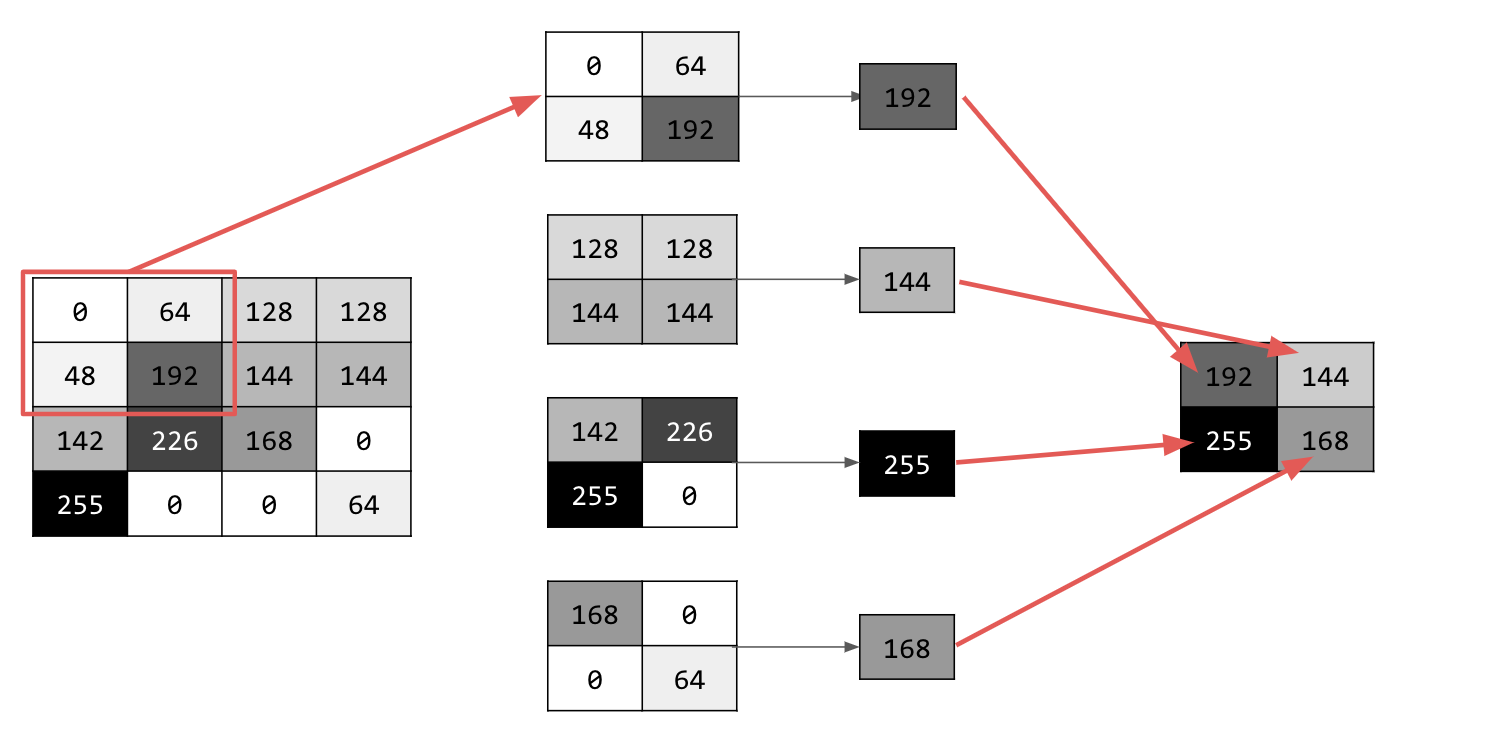

In [65]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2), int(y/2)] = pixels[0]

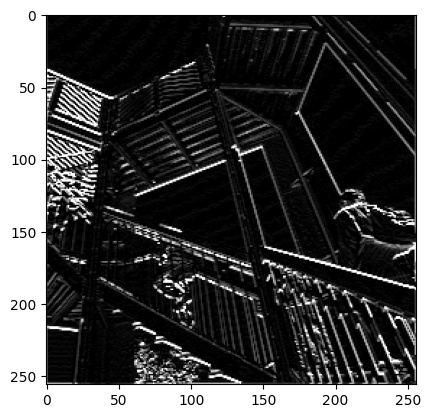

In [66]:
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()

## Parte 4 - Projetos com CNNs (Mnist e Pedra papel e tesoura)

### Mnist

codlabs: https://developers.google.com/codelabs/tensorflow-4-cnns?hl=pt-br#0

Está será uma Rede neural mais elaborada que a apresentada na parte 2

nesse caso as camadas convolucionais foram adicionadaas primeiro

In [24]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0

In [25]:
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
# Essa próxima camada irá achatar(Flatten) a saída, para obtermos a mesma estrutura de rede neural profunda que tinhamos antes das camadas convolucionais
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [38]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [40]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 49s 26ms/step - loss: 2.3028 - accuracy: 0.0979
Epoch 2/5
1875/1875 [==============================] - 46s 25ms/step - loss: 2.3028 - accuracy: 0.0993
Epoch 3/5
1875/1875 [==============================] - 50s 27ms/step - loss: 2.3028 - accuracy: 0.0982
Epoch 4/5
1875/1875 [==============================] - 46s 25ms/step - loss: 2.3028 - accuracy: 0.0991
Epoch 5/5
1875/1875 [==============================] - 45s 24ms/step - loss: 2.3028 - accuracy: 0.0979


In [35]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

313/313 [==============================] - 4s 11ms/step - loss: 2.3027 - accuracy: 0.1000
Test loss: 2.3027186393737793, Test accuracy: 10.000000149011612


In [42]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 49ms/step


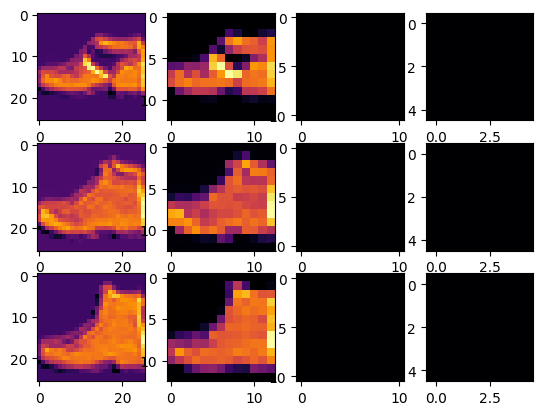

In [44]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=23
SECOND_IMAGE=28
THIRD_IMAGE=39
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

### Pedra Papel Tesoura

Link do Vídeo: https://www.youtube.com/watch?v=u2TjZzNuly8

Fonte dos dados e projeto: https://www.tensorflow.org/datasets/catalog/rock_paper_scissors?hl=pt-br

In [4]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00


In [5]:
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files

In [80]:
# Download dos arquivos treino e teste, através do site no link a cima ou do código a seguir em uma pasta temporária:

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps.zip \
    -O /tmp/rps.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2024-07-29 14:37:03--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.207, 64.233.187.207, 64.233.188.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  25.6MB/s    in 8.5s    

2024-07-29 14:37:12 (22.5 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2024-07-29 14:37:12--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.207, 64.233.187.207, 64.233.188.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rps-

In [81]:
# Descompactar os arquivos treino e teste

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [82]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock05ck01-030.png', 'rock02-027.png', 'rock04-022.png', 'rock06ck02-050.png', 'rock06ck02-065.png', 'rock06ck02-041.png', 'rock01-016.png', 'rock03-033.png', 'rock07-k03-069.png', 'rock05ck01-097.png']
['paper04-044.png', 'paper07-022.png', 'paper07-038.png', 'paper01-028.png', 'paper03-045.png', 'paper05-054.png', 'paper05-076.png', 'paper06-102.png', 'paper07-103.png', 'paper01-077.png']
['testscissors03-100.png', 'scissors03-080.png', 'testscissors02-021.png', 'scissors01-067.png', 'scissors02-066.png', 'scissors02-067.png', 'scissors01-053.png', 'scissors04-044.png', 'scissors01-109.png', 'scissors04-104.png']


In [ ]:
pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [84]:
TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator( # O ImageDataGenerator, irá rotular automaticamente as imagens com base no nome da pasta
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory( # O training_datagen irá criar dados de treinamentos
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

# O mesmo que foi feito para os dados de Treino (Train) será feito para os de Teste (Validation)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [85]:
model = tf.keras.models.Sequential([
    # A imagem de entrada será formatada para 150x150 com 3 bytes de cor.
    # 4 Camadas Convoulicionais com MaxPool
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), # Eliminando Neuronios para otimizar a Rede Neural
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') # Saida em camada de 3 neuronios (Pedra, Papel ou Tesoura)
])

In [86]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 17, 17, 128)      

In [87]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)
# Nesse caso não temos rótulos, pois serão utilizados os que já foram gerados dos diretórios py.

model.save("rps.h5")

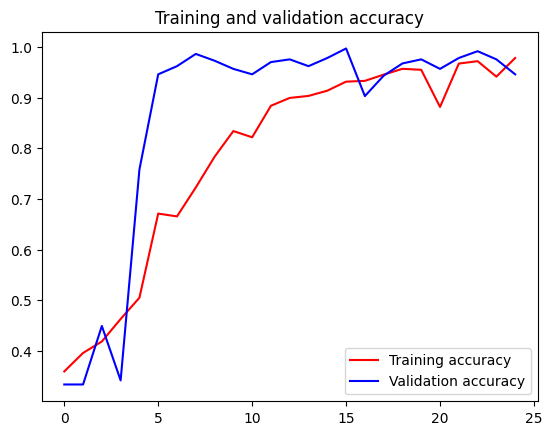

<Figure size 640x480 with 0 Axes>

In [89]:
# Avaliando graficamente a acurácia no Treino e no Teste

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
# Aplicação do modelo em arquivos selecionados pelo usuário

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

obs: é possível otimizar os dois projetos resolvendo os problemas de Overfitting

# Possível continuação:

## Parte 5: https://developers.google.com/codelabs/tensorflow-5-compleximages?hl=pt-br#10


## Part 6: https://developers.google.com/codelabs/tensorflow-6-largecnns#8